In [7]:
import pandas as pd



# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [8]:
df.columns

Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

# Select features and target
features = ['Hidden Gem Score', 'Runtime', 'Rotten Tomatoes Score', 
           'Metacritic Score', 'Awards Received', 'Awards Nominated For',
           'Boxoffice', 'IMDb Votes', 'Minimum Age'] + \
           [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 
           'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
           'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 
           'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

target = 'IMDb Score'

# Preprocessing
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train SVM model with RBF kernel
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2}')

# Example prediction
example = X_test[0].reshape(1, -1)
prediction = model.predict(example)
print(f'Predicted IMDb Score: {prediction[0]:.2f}')

Mean Absolute Error: 0.35
Mean Squared Error: 0.23
R^2 Score: 0.7303704514043287
Predicted IMDb Score: 8.26


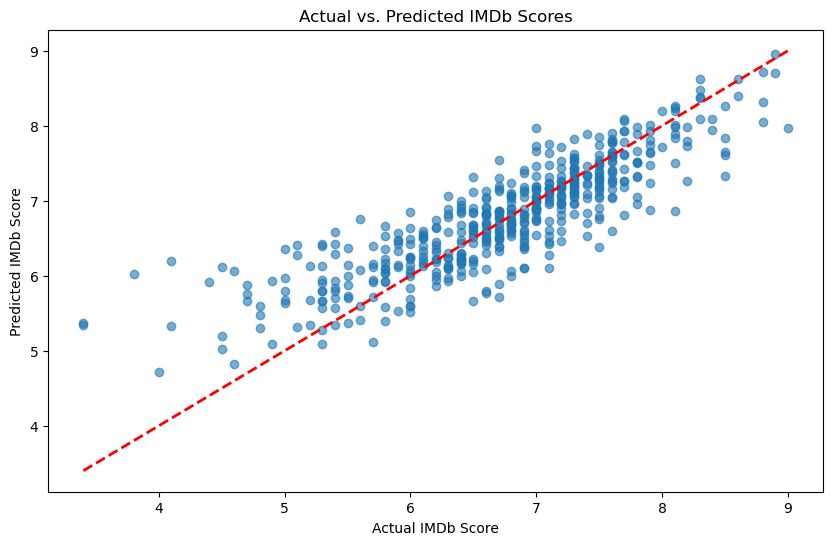

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted IMDb scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs. Predicted IMDb Scores')
plt.show()